In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao1"
CAND1_PATH = "data/paredao1/bianca.csv"
CAND2_PATH = "data/paredao1/chumbo.csv"
DATE = 2

In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment", "date", "likes_count", "retweets_count"]]
cand2 = candidate2_df[["tweet", "sentiment", "date", "likes_count", "retweets_count"]]

# Bianca

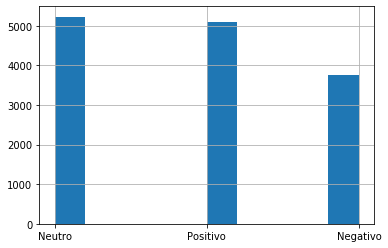

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment,date,likes_count,retweets_count
0,900,Neutro,2020-01-28,0,0
1,Meus princesos,Positivo,2020-01-28,0,0
2,ai que lindas ): ASSISTA ÁUDIO DE DESCULPAS,Positivo,2020-01-28,0,0
3,Obgd,Neutro,2020-01-28,0,0
4,"Obgdd, aproveita e me segue adm ❤️❤️",Positivo,2020-01-28,0,0
...,...,...,...,...,...
14089,Ai gente tomara que o paredão não seja entre B...,Negativo,2020-01-26,7,0
14090,Caraaaa se o paredão for entre : \nPyong× boca...,Neutro,2020-01-26,0,0
14091,Petrix acha q tem liderança eterna né? Pancada...,Neutro,2020-01-26,1,0
14092,Gente a globo tá msm ignorando oq o Petrix fe...,Negativo,2020-01-26,0,0


# Chumbo (Eliminado)

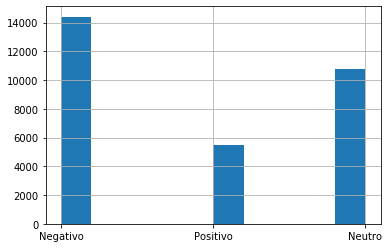

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment,date,likes_count,retweets_count
0,Só esperando o @lucaschumbo ser eliminado,Negativo,2020-01-28,0,0
1,#ficachumbo vamos votar genteeee 🏄🏻‍♂️🏄🏻‍♂️🏄🏻‍...,Positivo,2020-01-28,1,0
2,Menino tóxico,Neutro,2020-01-28,1,0
3,@lucaschumbo pic.twitter.com/bhXdgK3e0v,Neutro,2020-01-28,0,0
4,Eu tbm não queria,Neutro,2020-01-28,1,0
...,...,...,...,...,...
30662,"Ahhh marcela e Gi falando de votar no chumbo, ...",Neutro,2020-01-26,2,1
30663,"marcela vai votar no chumbo, essa mulher não e...",Negativo,2020-01-26,1,1
30664,MARCELA E GI VÃO NO CHUMBO UFA #bbb20,Positivo,2020-01-26,3,2
30665,Marcela está falando sobre votos com Gizelly e...,Neutro,2020-01-26,3,0


# Quantidades absolutas

In [9]:
candidates = {"bianca_andrade": cand1, "lucas_chumbo": cand2}

In [10]:
qtds_df = get_raw_quantities(candidates)

In [11]:
qtds_df

,positivos,neutros,negativos
nome,,,
bianca_andrade,5102,5230,3762
lucas_chumbo,5460,10796,14411


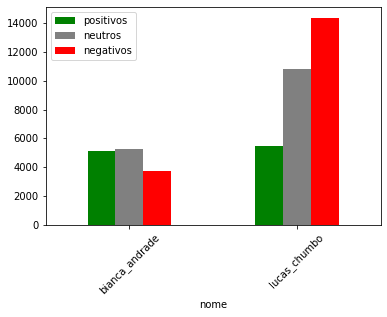

In [12]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [13]:
pcts_df = get_pct_by_candidate(candidates)

In [14]:
pcts_df

,positivos,neutros,negativos
nome,,,
bianca_andrade,0.361998,0.37108,0.266922
lucas_chumbo,0.178042,0.35204,0.469919


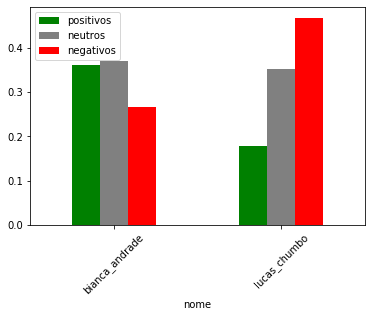

In [15]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [16]:
qtds_df_copy = qtds_df.copy()

In [17]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [18]:
qtds_df

,positivos,neutros,negativos
nome,,,
bianca_andrade,0.483052,0.326345,0.20701
lucas_chumbo,0.516948,0.673655,0.79299


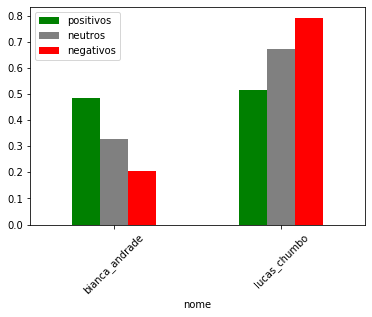

In [19]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Tweets por dia

In [20]:
names = list(candidates.keys())
tweets_by_day_df = get_tweets_by_day(candidates[names[0]], names[0])
for name in names[1:]:
    current = get_tweets_by_day(candidates[name], name)
    tweets_by_day_df = tweets_by_day_df.append(current)

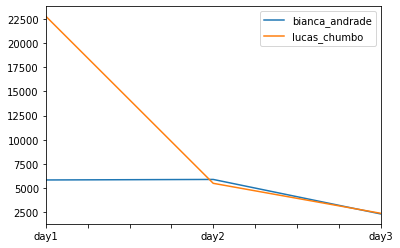

In [21]:
tweets_by_day_df.transpose().plot()

# Seleção de atributos

In [22]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_individual_pct")
atributes_df = atributes_df.join(qtds_df, rsuffix="_global_pct")
atributes_df = atributes_df.join(tweets_by_day_df)

In [23]:
raw_participantes_info = get_participantes_info()[DATE]
print("Atualização de seguidores em:", raw_participantes_info["date"])

Atualização de seguidores em: 25-03-2020


In [24]:
participantes_info = raw_participantes_info["infos"]
paredoes_info = get_paredoes_info()

In [25]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [26]:
likes = [get_likes_count(candidates[participante]) for participante in atributes_df.index]

In [27]:
retweets = [get_retweets_count(candidates[participante]) for participante in atributes_df.index]

In [28]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [29]:
atributes_df["likes"] = likes
atributes_df["retweets"] = retweets
atributes_df["seguidores"] = followers
atributes_df["rejeicao"] = rejection

In [30]:
atributes_df

,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,likes,retweets,seguidores,rejeicao
nome,,,,,,,,,,,,,,,,
bianca_andrade,5102,5230,3762,0.361998,0.37108,0.266922,0.483052,0.326345,0.20701,5849,5903,2342,407879,57730,411880,0.2446
lucas_chumbo,5460,10796,14411,0.178042,0.35204,0.469919,0.516948,0.673655,0.79299,22759,5502,2406,667691,132858,12014,0.7594


In [31]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))